<a href="https://colab.research.google.com/github/Nipun1611081/Crop-Advisor/blob/master/test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

*//Reading Data for Bihar for MAY*

---



In [0]:
df = pd.read_csv("/content/drive/My Drive/Colab Notebooks/test_data.csv")
avg_rain= df.loc[df['SUBDIVISION']=='Bihar']
avg_rain= avg_rain[['YEAR','MAY']]
avg_rain= avg_rain.set_index(['YEAR'])
avg_rain.head(5)

,MAY
YEAR,
1901,65.6
1902,66.3
1903,28.2
1904,118.7
1905,77.5


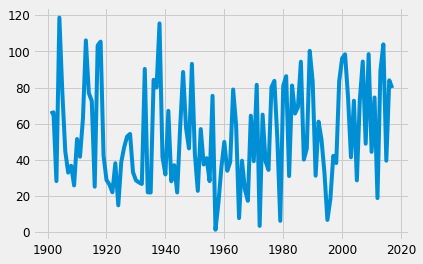

In [0]:
plt.plot(avg_rain)

In [0]:
#rolling stats for stationarity
rol1= avg_rain.rolling(window=12).mean()
rol2= avg_rain.rolling(window=12).std()
print (rol1,rol2)

            MAY
YEAR           
1901        NaN
1902        NaN
1903        NaN
1904        NaN
1905        NaN
1906        NaN
1907        NaN
1908        NaN
1909        NaN
1910        NaN
1911        NaN
1912  54.358333
1913  57.733333
1914  58.625000
1915  62.316667
1916  54.516667
1917  56.666667
1918  61.725000
1919  62.508333
1920  61.850000
1921  61.891667
1922  59.433333
1923  59.133333
1924  55.141667
1925  49.516667
1926  47.016667
1927  45.383333
1928  47.816667
1929  41.966667
1930  35.566667
...         ...
1988  61.366667
1989  62.750000
1990  65.375000
1991  67.458333
1992  65.808333
1993  62.875000
1994  63.016667
1995  56.816667
1996  52.866667
1997  50.616667
1998  45.941667
1999  49.566667
2000  53.733333
2001  53.575000
2002  52.866667
2003  53.716667
2004  54.683333
2005  52.808333
2006  56.183333
2007  63.491667
2008  66.050000
2009  70.741667
2010  71.258333
2011  70.500000
2012  64.050000
2013  63.308333
2014  65.733333
2015  65.575000
2016  66.516667
2017  70

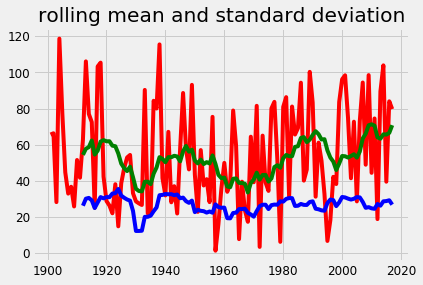

In [0]:
#plotting mean and std deviation
orig= plt.plot(avg_rain,color="red",label="original")
avg= plt.plot(rol1,color="green",label="mean")
std= plt.plot(rol2,color="blue",label="std")
plt.title("rolling mean and standard deviation")
plt.show(block=False)

In [0]:
from statsmodels.tsa.stattools import adfuller
print("DF test")
dftest= adfuller(avg_rain['MAY'],autolag="AIC")
dfop= pd.Series(dftest[0:4],index=["test stats","p-value","lags used","no of observations used"])
for key,value in dftest[4].items():
  dfop["Critical value used (%s)"%key]= value


print (dfop)

#proves that data is non stationary


DF test
test stats                  -9.219772e+00
p-value                      1.793015e-15
lags used                    0.000000e+00
no of observations used      1.160000e+02
Critical value used (1%)    -3.488022e+00
Critical value used (5%)    -2.886797e+00
Critical value used (10%)   -2.580241e+00
dtype: float64


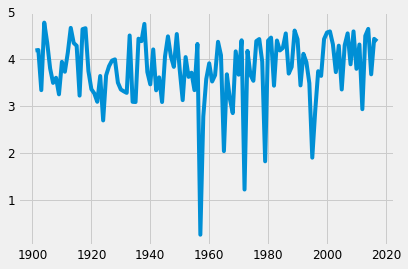

In [0]:
avg_rainlog= np.log(avg_rain)
plt.plot(avg_rainlog)

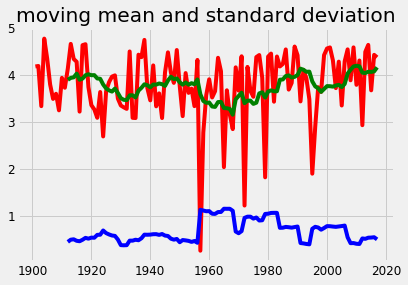

In [0]:
mrol1= avg_rainlog.rolling(window=12).mean()
mrol2= avg_rainlog.rolling(window=12).std()
#plotting mean and std deviation for moving average
orig= plt.plot(avg_rainlog,color="red",label="original")
avg= plt.plot(mrol1,color="green",label="mean")
std= plt.plot(mrol2,color="blue",label="std")
plt.title("moving mean and standard deviation")
plt.show(block=False)

In [0]:
normalized_avg_rain= avg_rainlog - mrol1
normalized_avg_rain.dropna(inplace=True)
normalized_avg_rain.head()


,MAY
YEAR,
1912,0.238278
1913,0.724231
1914,0.391186
1915,0.252279
1916,-0.678962


In [0]:
from statsmodels.tsa.stattools import adfuller
def calculate(test):
 mrol1= test.rolling(window=12).mean()
 mrol2= test.rolling(window=12).std()
#plotting mean and std deviation for moving average
 orig= plt.plot(test,color="red",label="original")
 avg= plt.plot(mrol1,color="green",label="mean")
 std= plt.plot(mrol2,color="blue",label="std")
 plt.title("moving mean and standard deviation")
 plt.show(block=False)
 print("DF test")
 dftest= adfuller(test['MAY'],autolag="AIC")
 dfop= pd.Series(dftest[0:4],index=["test stats","p-value","lags used","no of observations used"])
 for key,value in dftest[4].items():
   dfop["Critical value used (%s)"%key]= value
 print (dfop)
 

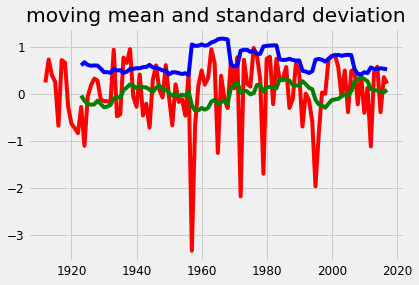

DF test
test stats                  -9.599620e+00
p-value                      1.936299e-16
lags used                    0.000000e+00
no of observations used      1.050000e+02
Critical value used (1%)    -3.494220e+00
Critical value used (5%)    -2.889485e+00
Critical value used (10%)   -2.581676e+00
dtype: float64


In [0]:
calculate(normalized_avg_rain)

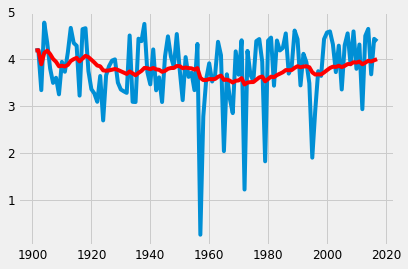

In [0]:
edecay= avg_rainlog.ewm(halflife=12,min_periods=0,adjust=True).mean()
plt.plot(avg_rainlog)
plt.plot(edecay,color="red")

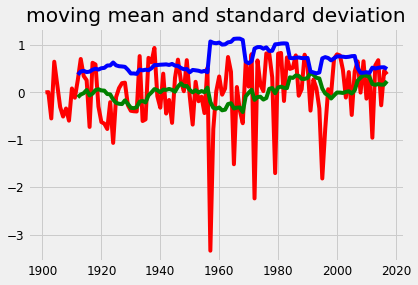

DF test
test stats                  -1.021080e+01
p-value                      5.645208e-18
lags used                    0.000000e+00
no of observations used      1.160000e+02
Critical value used (1%)    -3.488022e+00
Critical value used (5%)    -2.886797e+00
Critical value used (10%)   -2.580241e+00
dtype: float64


In [0]:
avg_rain_decay= avg_rainlog - edecay
calculate (avg_rain_decay)